In [23]:
# Imports
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline
from random import randint
import numpy as np
import math
from scipy import integrate
from scipy.interpolate import interp1d
from sklearn import preprocessing   #https://www.digitalocean.com/community/tutorials/normalize-data-in-python

In [24]:
### Reading Provided Data

In [25]:
# File Names
spec_file = 'rx_spectrum_early.csv'
spec_file2 = 'rx_spectrum_late.csv'
xs_file = 'cevns_xs_rx.csv'

In [26]:
# Read Early Spectrum CSV File (for 1 MW_th)
energies = []
counts = []

with open(spec_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies.append(float(row[0]))
        counts.append(float(row[1]))

In [27]:
# Read Late Spectrum CSV File (for 1 MW_th)
energies_2 = []
counts_2 = []

with open(spec_file2) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_2.append(float(row[0]))
        counts_2.append(float(row[1]))

In [28]:
# Read XS csv file
energies_xs = []
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_xs.append(float(row[0]))
        xs.append(float(row[1]))

In [29]:
# As the functions are defined by slightly different energies, I interpolate
xs_func = interp1d(energies_xs, xs)
early_func = interp1d(energies, counts)
late_func = interp1d(energies_2, counts_2)

In [30]:
### Defining All Variables

In [31]:
# Defining Known Variables
N_A = 6.0221408*10**(23)  #atoms/mole
A = 64*0.486 + 66*0.279 + 67*0.041 + 68*0.188
mu = 3.1

In [32]:
source_flux = sum(counts)
source_flux_late = sum(counts_2)

In [34]:
# Calculate Weighted Average XS
avg = []
weights = []
for i in range(len(energies)):
    avg.append(xs[i]*counts[i])
    weights.append(counts[i])
integral = sum(avg)/sum(weights)
print(integral)  # in cm^2

9.399786174288943e-41


In [35]:
# Combining Knowns
constant_term = (4*math.pi*mu*A)/(integral*10**(-4)*N_A*source_flux)

In [36]:
### Reactor Status Calculations

In [37]:
# Now lets break it down! Starting with r=1m
M_s = range(10, 4000)

r1 = 10
M_dec_r1 = []
for m in M_s:
    M_dec_r1.append(constant_term*r1**2/(m*60*1000000))

r2 = 50
M_dec_r2 = []
for m in M_s:
    M_dec_r2.append(constant_term*r2**2/(m*60*1000000))
    
r3 = 100
M_dec_r3 = []
for m in M_s:
    M_dec_r3.append(constant_term*r3**2/(m*60*1000000))

r4 = 500
M_dec_r4 = []
for m in M_s:
    M_dec_r4.append(constant_term*r4**2/(m*60*1000000))

r5 = 1000
M_dec_r5 = []
for m in M_s:
    M_dec_r5.append(constant_term*r5**2/(m*60*1000000))

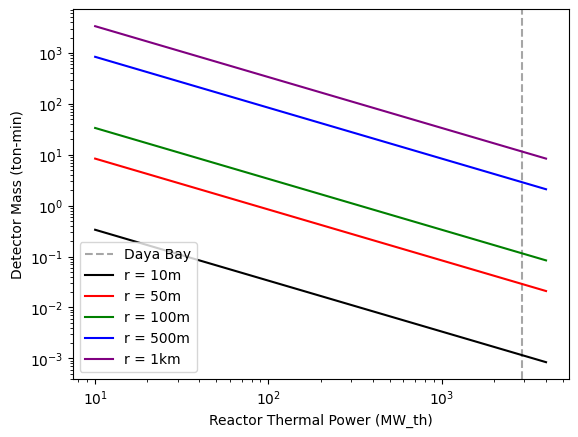

In [38]:
# Graph
#plt.axvline(x=58.3, color='grey', ls='dashed', alpha=0.5)
#plt.axvline(x=2905, color='grey', ls='dashed', alpha=0.5)
plt.axvline(x=2905, color='grey', ls='dashed', alpha=0.7, label = 'Daya Bay')
#plt.axvline(x=3758, color='grey', ls='dashed', alpha=0.5)
plt.plot(M_s, M_dec_r1, color='black', label='r = 10m')
plt.plot(M_s, M_dec_r2, color='red', label='r = 50m')
plt.plot(M_s, M_dec_r3, color='green', label='r = 100m')
plt.plot(M_s, M_dec_r4, color='blue', label='r = 500m')
plt.plot(M_s, M_dec_r5, color='purple', label='r = 1km')
#plt.plot(M_s, line)
plt.legend()
plt.xlabel('Reactor Thermal Power (MW_th)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Detector Mass (ton-min)')
plt.savefig('reactor_ratio.png')

In [87]:
# Use as calculator 
ms = constant_term * 10**2/(120*60*1000000)
print(ms)

md = constant_term * 1000**2/(2*4590*60*1000000)
print(md)

0.02806178312357063
3.668206944257599


In [68]:
### Reactor Fuel Composition Calculations

In [69]:
# Calculate Weighted Average XS
avg_2 = []
weights_2 = []
for i in range(len(energies_2)):
    avg_2.append(xs[i]*counts_2[i])
    weights_2.append(counts_2[i])
integral_2 = sum(avg_2)/sum(weights_2)
print(integral_2)  # in cm^2

9.266205528683979e-41


In [70]:
# Defining Different Constant Terms
frac_term = source_flux*integral/((source_flux*integral)-(source_flux_late*integral_2))**2
const = 16*math.pi*A/(10**(-4)*N_A)

In [71]:
comp_r1 = []
for m in M_s:
    comp_r1.append(const*frac_term*r1**2/(m*60*1000000))
    
comp_r2 = []
for m in M_s:
    comp_r2.append(const*frac_term*r2**2/(m*60*1000000))
    
comp_r3 = []
for m in M_s:
    comp_r3.append(const*frac_term*r3**2/(m*60*1000000))
    
comp_r4 = []
for m in M_s:
    comp_r4.append(const*frac_term*r4**2/(m*60*1000000))

comp_r5 = []
for m in M_s:
    comp_r5.append(const*frac_term*r5**2/(m*60*1000000))

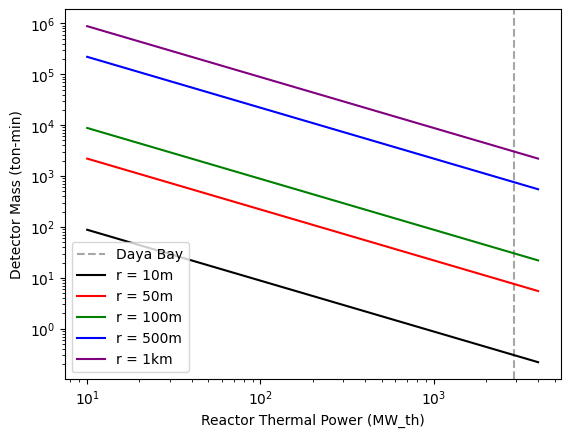

In [72]:
# Graph
#plt.axvline(x=58.3, color='grey', ls='dashed', alpha=0.5)
plt.axvline(x=2905, color='grey', ls='dashed', alpha=0.7, label = 'Daya Bay')
#plt.axvline(x=3758, color='grey', ls='dashed', alpha=0.5)
plt.plot(M_s, comp_r1, color='black', label='r = 10m')
plt.plot(M_s, comp_r2, color='red', label='r = 50m')
plt.plot(M_s, comp_r3, color='green', label='r = 100m')
plt.plot(M_s, comp_r4, color='blue', label='r = 500m')
plt.plot(M_s, comp_r5, color='purple', label='r = 1km')
plt.legend()
plt.xlabel('Reactor Thermal Power (MW_th)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Detector Mass (ton-min)')
plt.savefig('fuel_ratio.png')

In [98]:
# Use as calculator 
ms = const*frac_term*10**2/(120*60*1000000)
print(ms)

md = const*frac_term*1000**2/(2*4590*60*1000000)
print(md)

7.338868666837923
959.3292374951534
